# Segment Anything Model (SAM) Demonstration

In [1]:
# install
!pip install -q git+https://github.com/facebookresearch/segment-anything.git
!pip install -q opencv-python matplotlib

  Preparing metadata (setup.py) ... done


In [2]:
# import libraries
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt
from segment_anything import sam_model_registry, SamPredictor
import os
import requests

In [3]:
# download pre-trained weights (ViT-H SAM model)
SAM_CHECKPOINT = "sam_vit_h_4b8939.pth"
if not os.path.exists(SAM_CHECKPOINT):
    url = "https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth"
    r = requests.get(url, allow_redirects=True)
    open(SAM_CHECKPOINT, 'wb').write(r.content)

In [4]:
# load SAM model
model_type = "vit_h"
device = "cuda" if torch.cuda.is_available() else "cpu"

sam = sam_model_registry[model_type](checkpoint=SAM_CHECKPOINT)
sam.to(device=device)
predictor = SamPredictor(sam)

In [5]:
# upload the image
from google.colab import files
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

Saving lion.jpg to lion (1).jpg


In [6]:
# load the image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
predictor.set_image(image)

In [7]:
# sefine a point prompt (e.g., center of object)
input_point = np.array([[image.shape[1]//2, image.shape[0]//2]])
input_label = np.array([1])

In [8]:
# run prediction
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True
)

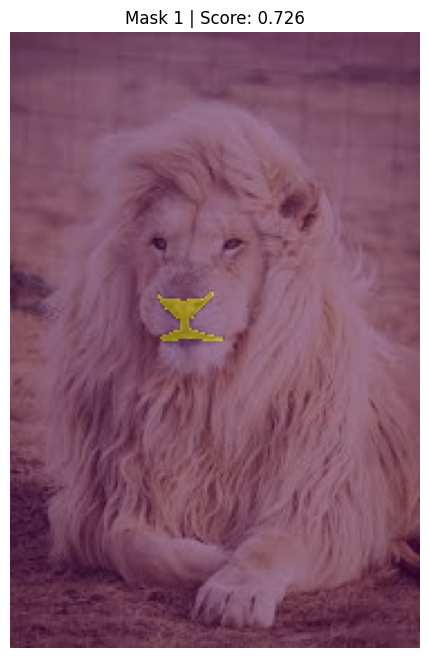

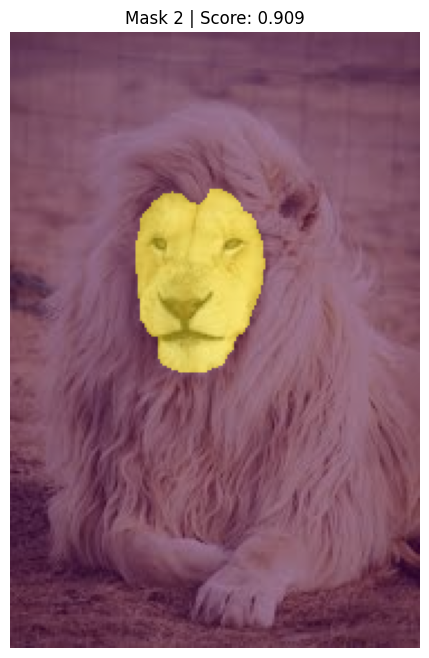

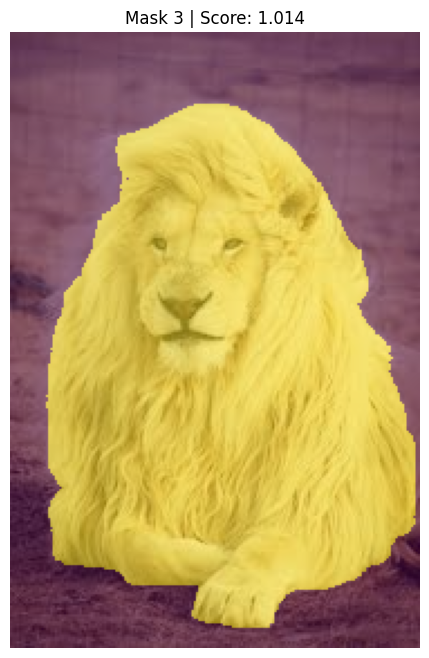

In [9]:
# visualize masks
for i, mask in enumerate(masks):
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.imshow(mask, alpha=0.5)
    plt.title(f"Mask {i+1} | Score: {scores[i]:.3f}")
    plt.axis("off")
    plt.show()